In [2]:
import numpy as np
import matplotlib.pyplot as plt


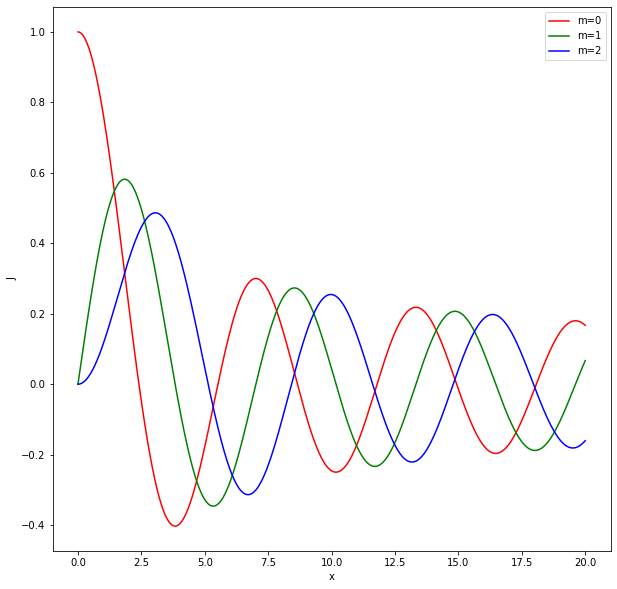

In [54]:
#PART A


def func(x,t,m): #function wishing to integrate
    return (1/np.pi) * np.cos(m*t - x*np.sin(t))

def J(x,n,m):
    a=0
    b=np.pi
    
    delt_x = (b-a)/n
    t_s = np.arange(a,b+delt_x, delt_x) #x0 = a , x1 = a + delt_x , x2 = a + 2 delt_x , etc...
    integral = 0          
    for i in range(n):
        integral += delt_x/6 * (func(x,t_s[i],m)+4*func(x, (t_s[i]+t_s[i+1])/2, m) + func(x, t_s[i+1],m))
    return integral


x = np.linspace(0,20,1000)

c = ['red','green','blue']

plt.figure(figsize=(10,10))
for i in range(0,3):
    plt.plot(x,J(x,1000,i),c[i], label=f'm={i}')
    #plt.plot(x,(J(x,1000,i)/x)**2,c[i], label=f'm={i}')
    
    
plt.legend()

plt.xlabel('x')
plt.ylabel('J')
plt.show()

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.25628141e-09 1.25628141e-09 1.25628141e-09 ... 1.25628141e-09
  1.25628141e-09 1.25628141e-09]
 [2.51256281e-09 2.51256281e-09 2.51256281e-09 ... 2.51256281e-09
  2.51256281e-09 2.51256281e-09]
 ...
 [2.47487437e-07 2.47487437e-07 2.47487437e-07 ... 2.47487437e-07
  2.47487437e-07 2.47487437e-07]
 [2.48743719e-07 2.48743719e-07 2.48743719e-07 ... 2.48743719e-07
  2.48743719e-07 2.48743719e-07]
 [2.50000000e-07 2.50000000e-07 2.50000000e-07 ... 2.50000000e-07
  2.50000000e-07 2.50000000e-07]]


/tmp/ipykernel_3924/3984768151.py:15: RuntimeWarning: divide by zero encountered in true_divide
  return (J(k*r,N,1)/(k*r))**2


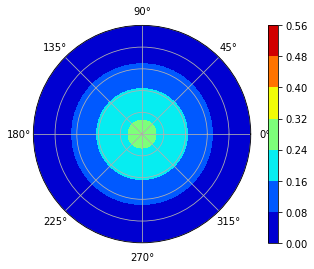

In [55]:
#PART B
import matplotlib.cm as cm
#DONT WORRY ABOUT RUNTIME WARNING NUMPY HANDLED THE INFINITY AND I REPLACED IT WITH CORRECT VALUES

#density plot

N = 200
r = np.linspace(0,0.25*10**(-6),N) 
t = np.linspace(0,2*np.pi,N)

R, T = np.meshgrid(r, t, indexing='ij')

print(R)
def I(r):
    k = (2*np.pi)/(500*10**(-9))
    return (J(k*r,N,1)/(k*r))**2 

intensity = I(R)
intensity[0] = np.zeros_like(intensity[0])+0.5

ax = plt.subplot(111, polar=True)
ax.set_yticklabels([])
ctf = ax.contourf(t, r, intensity, cmap=cm.jet)
plt.colorbar(ctf)